## Before start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Tue Jun 20 10:15:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **12.02.2023** with version **YOLOv8.0.28**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.120 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.1/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

/content
100% 22.8M/22.8M [00:00<00:00, 82.8MB/s]
Ultralytics YOLOv8.0.119 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients

100% 104k/104k [00:00<00:00, 70.5MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 164.4ms
Speed: 11.8ms preprocess, 164.4ms inference, 443.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8s-seg.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 159.3ms
Speed: 2.3ms preprocess, 159.3ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# For Update
!pip install --upgrade ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
results[0].boxes.xyxy

tensor([[4.4446e+00, 3.0434e+02, 6.4261e+02, 1.2755e+03],
        [6.2834e+02, 7.3451e+02, 6.9819e+02, 7.8832e+02],
        [3.5369e+01, 2.4992e+02, 6.4884e+02, 1.2759e+03],
        [3.3150e+02, 6.4431e+02, 5.3794e+02, 1.2545e+03],
        [8.8925e-01, 6.6045e+02, 4.4417e+02, 1.2785e+03]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.6489, 0.5239, 0.3784, 0.3442, 0.2668], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0.,  2., 16., 26., 24.], device='cuda:0')

In [ ]:
results[0].masks.data

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

In [ ]:
import cv2
from ultralytics import YOLO

img_pth = "ultralytics/assets/bus.jpg"
model = YOLO("yolov8x.pt")
results = model(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)
res_plotted = results[0].plot()

100%|██████████| 131M/131M [00:07<00:00, 18.4MB/s]

100%|██████████| 104k/104k [00:00<00:00, 64.2MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 66.1ms
Speed: 9.0ms preprocess, 66.1ms inference, 29.9ms postprocess per image at shape (1, 3, 640, 640)


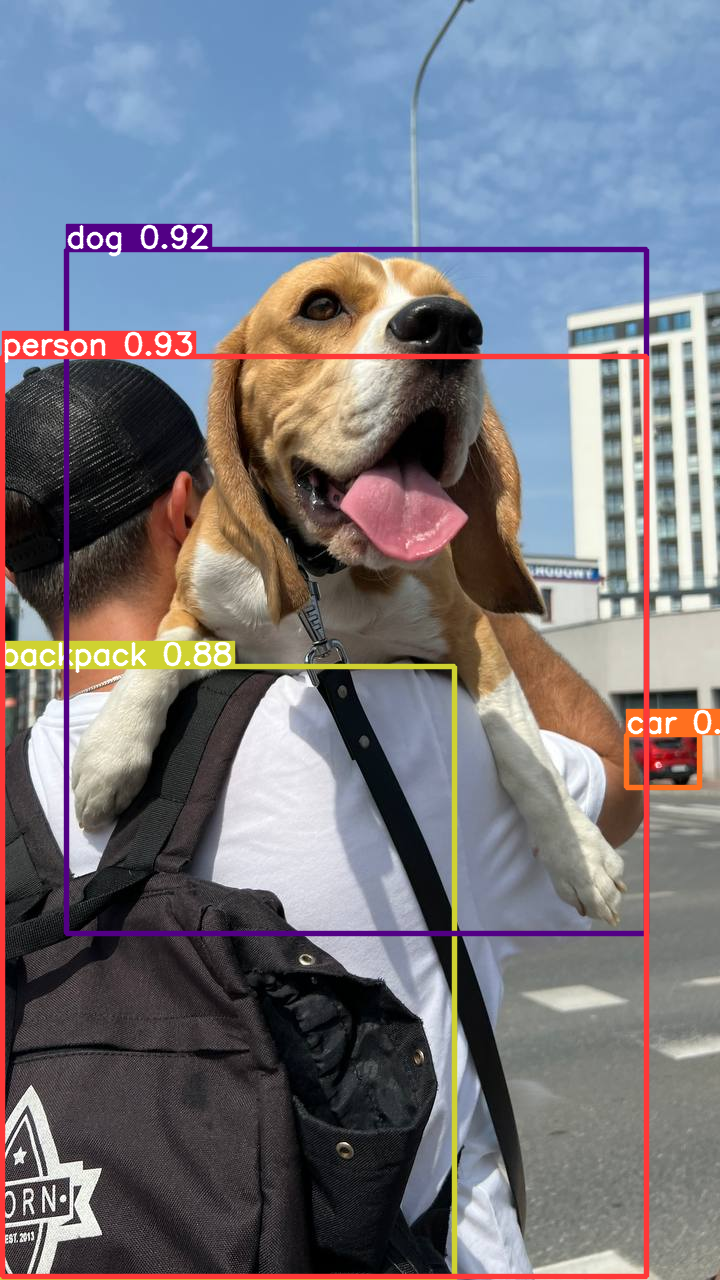

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(res_plotted)

# **Get Dataset and Training**

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="n7LbErnU3lfCFXkwwCWz")
project = rf.workspace("amano-shrimp-detection").project("yamato-shrimp-detection")
dataset = project.version(15).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.120, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to yamato-shrimp-detection-15 in yolov8:: 100%|██████████| 532/532 [00:00<00:00, 1205.35it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml batch=16 epochs=300 imgsz=640 patience=300 name=yolov8_shrimp_v15_20230531

/content
Ultralytics YOLOv8.0.111 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/yamato-shrimp-detection-15/data.yaml, epochs=300, patience=300, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8_shrimp_v15_20230531, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, fo

In [ ]:
!ls {HOME}/runs/segment/yolov8_shrimp_v15_20230531

args.yaml					    MaskP_curve.png
BoxF1_curve.png					    MaskPR_curve.png
BoxP_curve.png					    MaskR_curve.png
BoxPR_curve.png					    results.csv
BoxR_curve.png					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1685505313.7ff96eac41c5.7122.0  train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
MaskF1_curve.png				    weights


/content


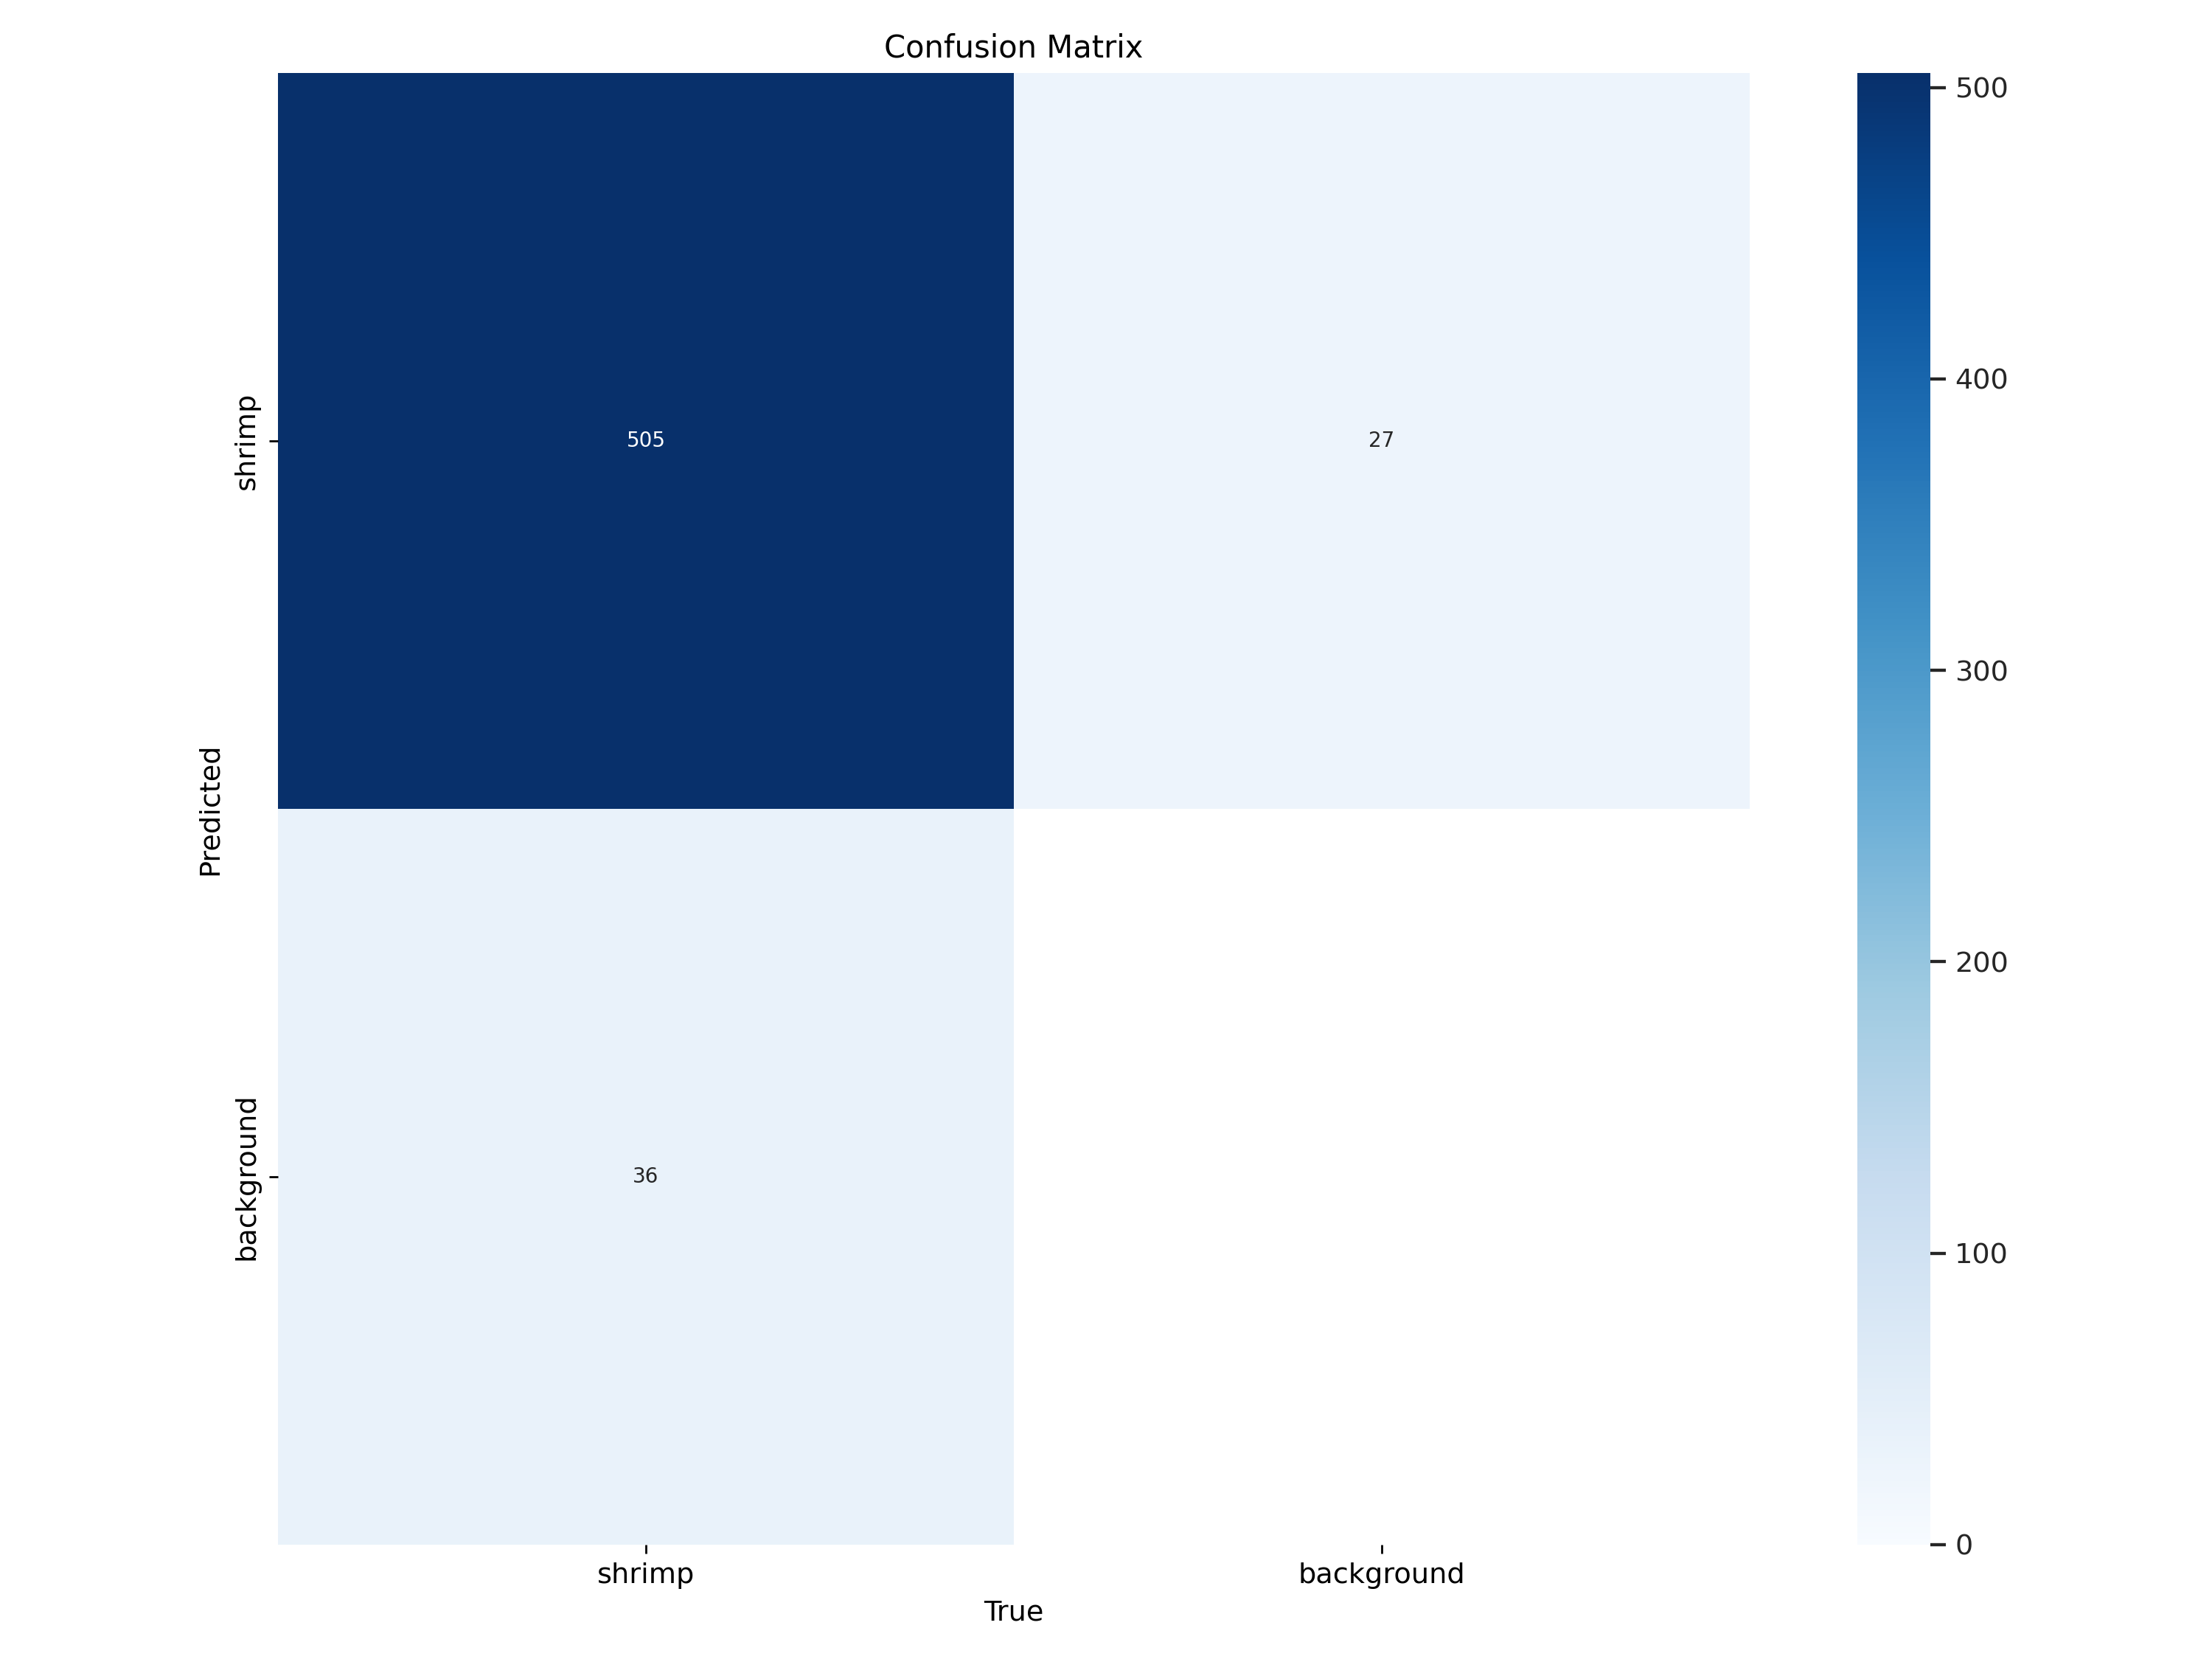

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/yolov8_shrimp_v15_20230531/confusion_matrix.png', width=600)

/content


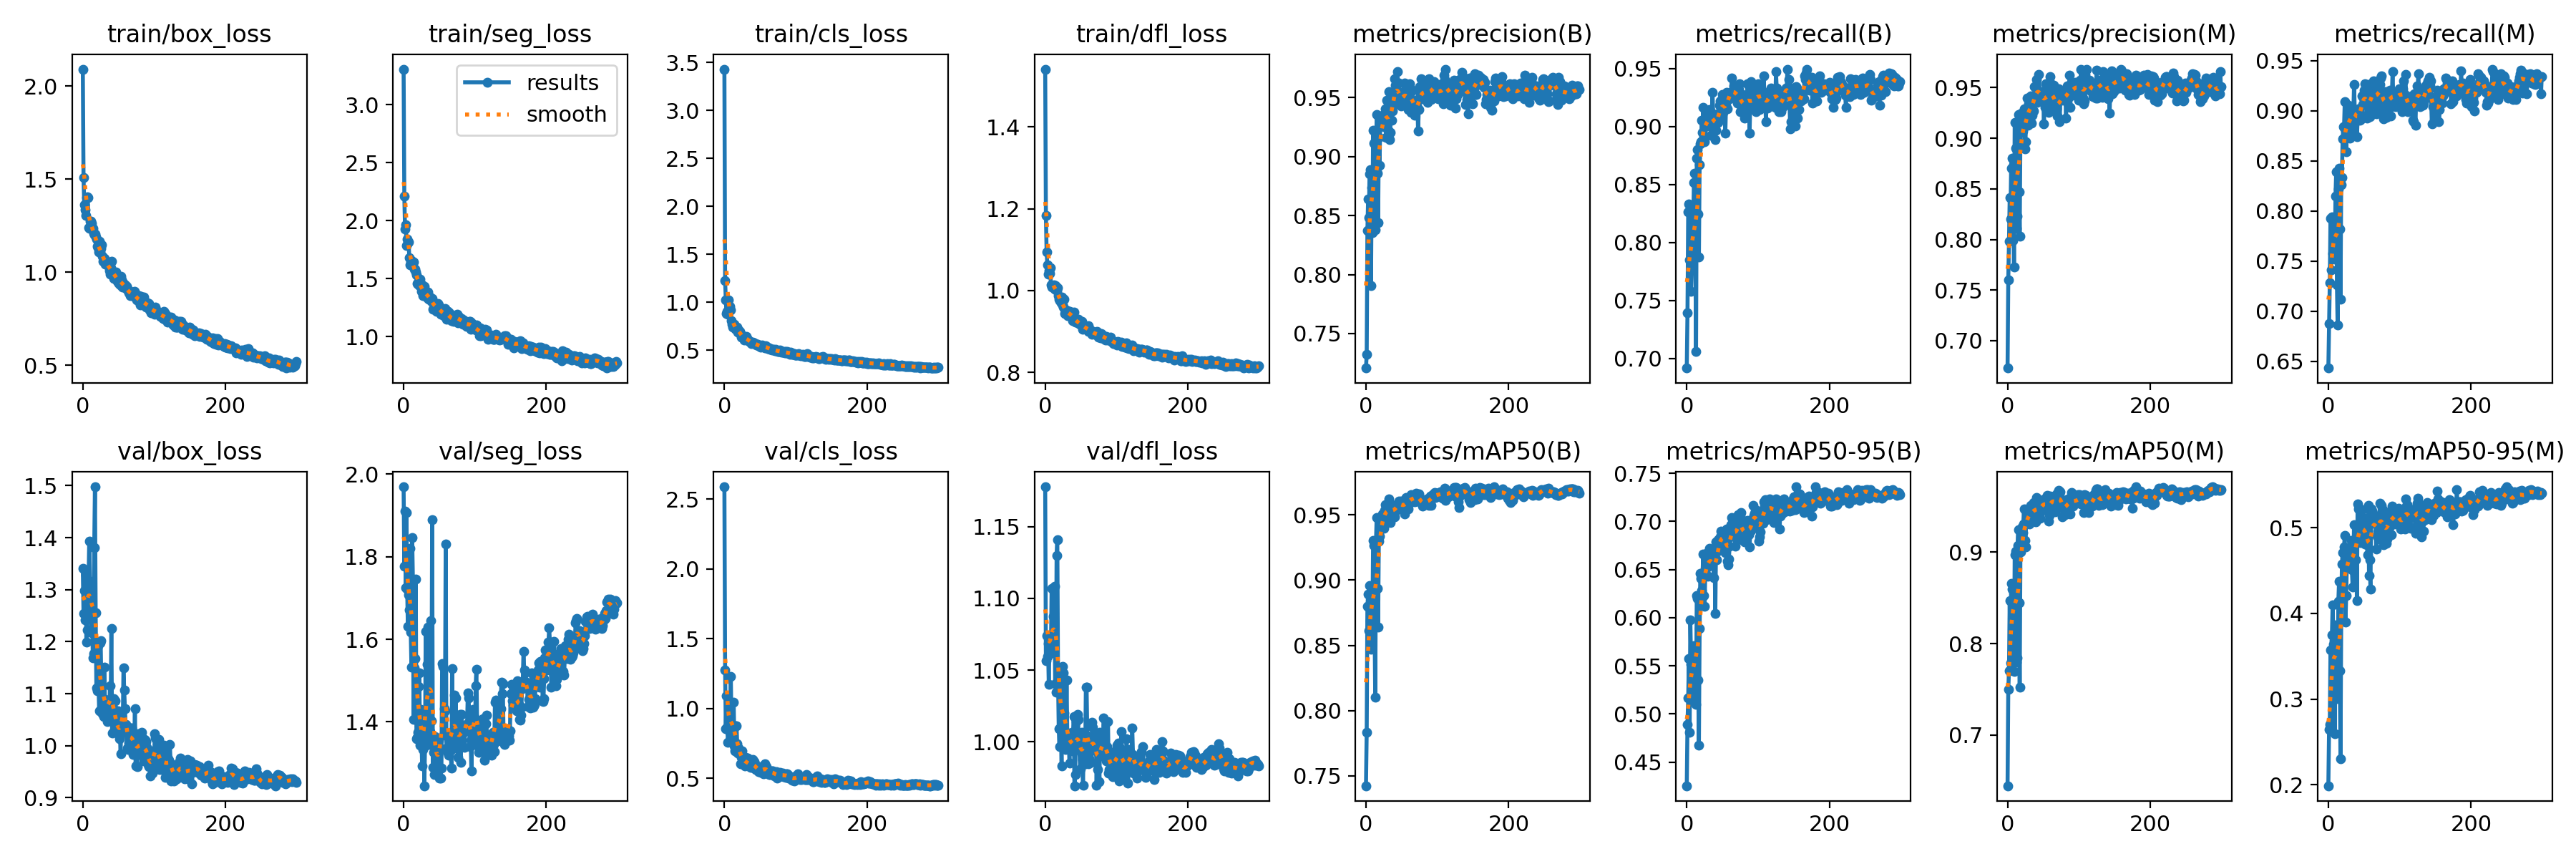

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/yolov8_shrimp_v15_20230531/results.png', width=600)

/content


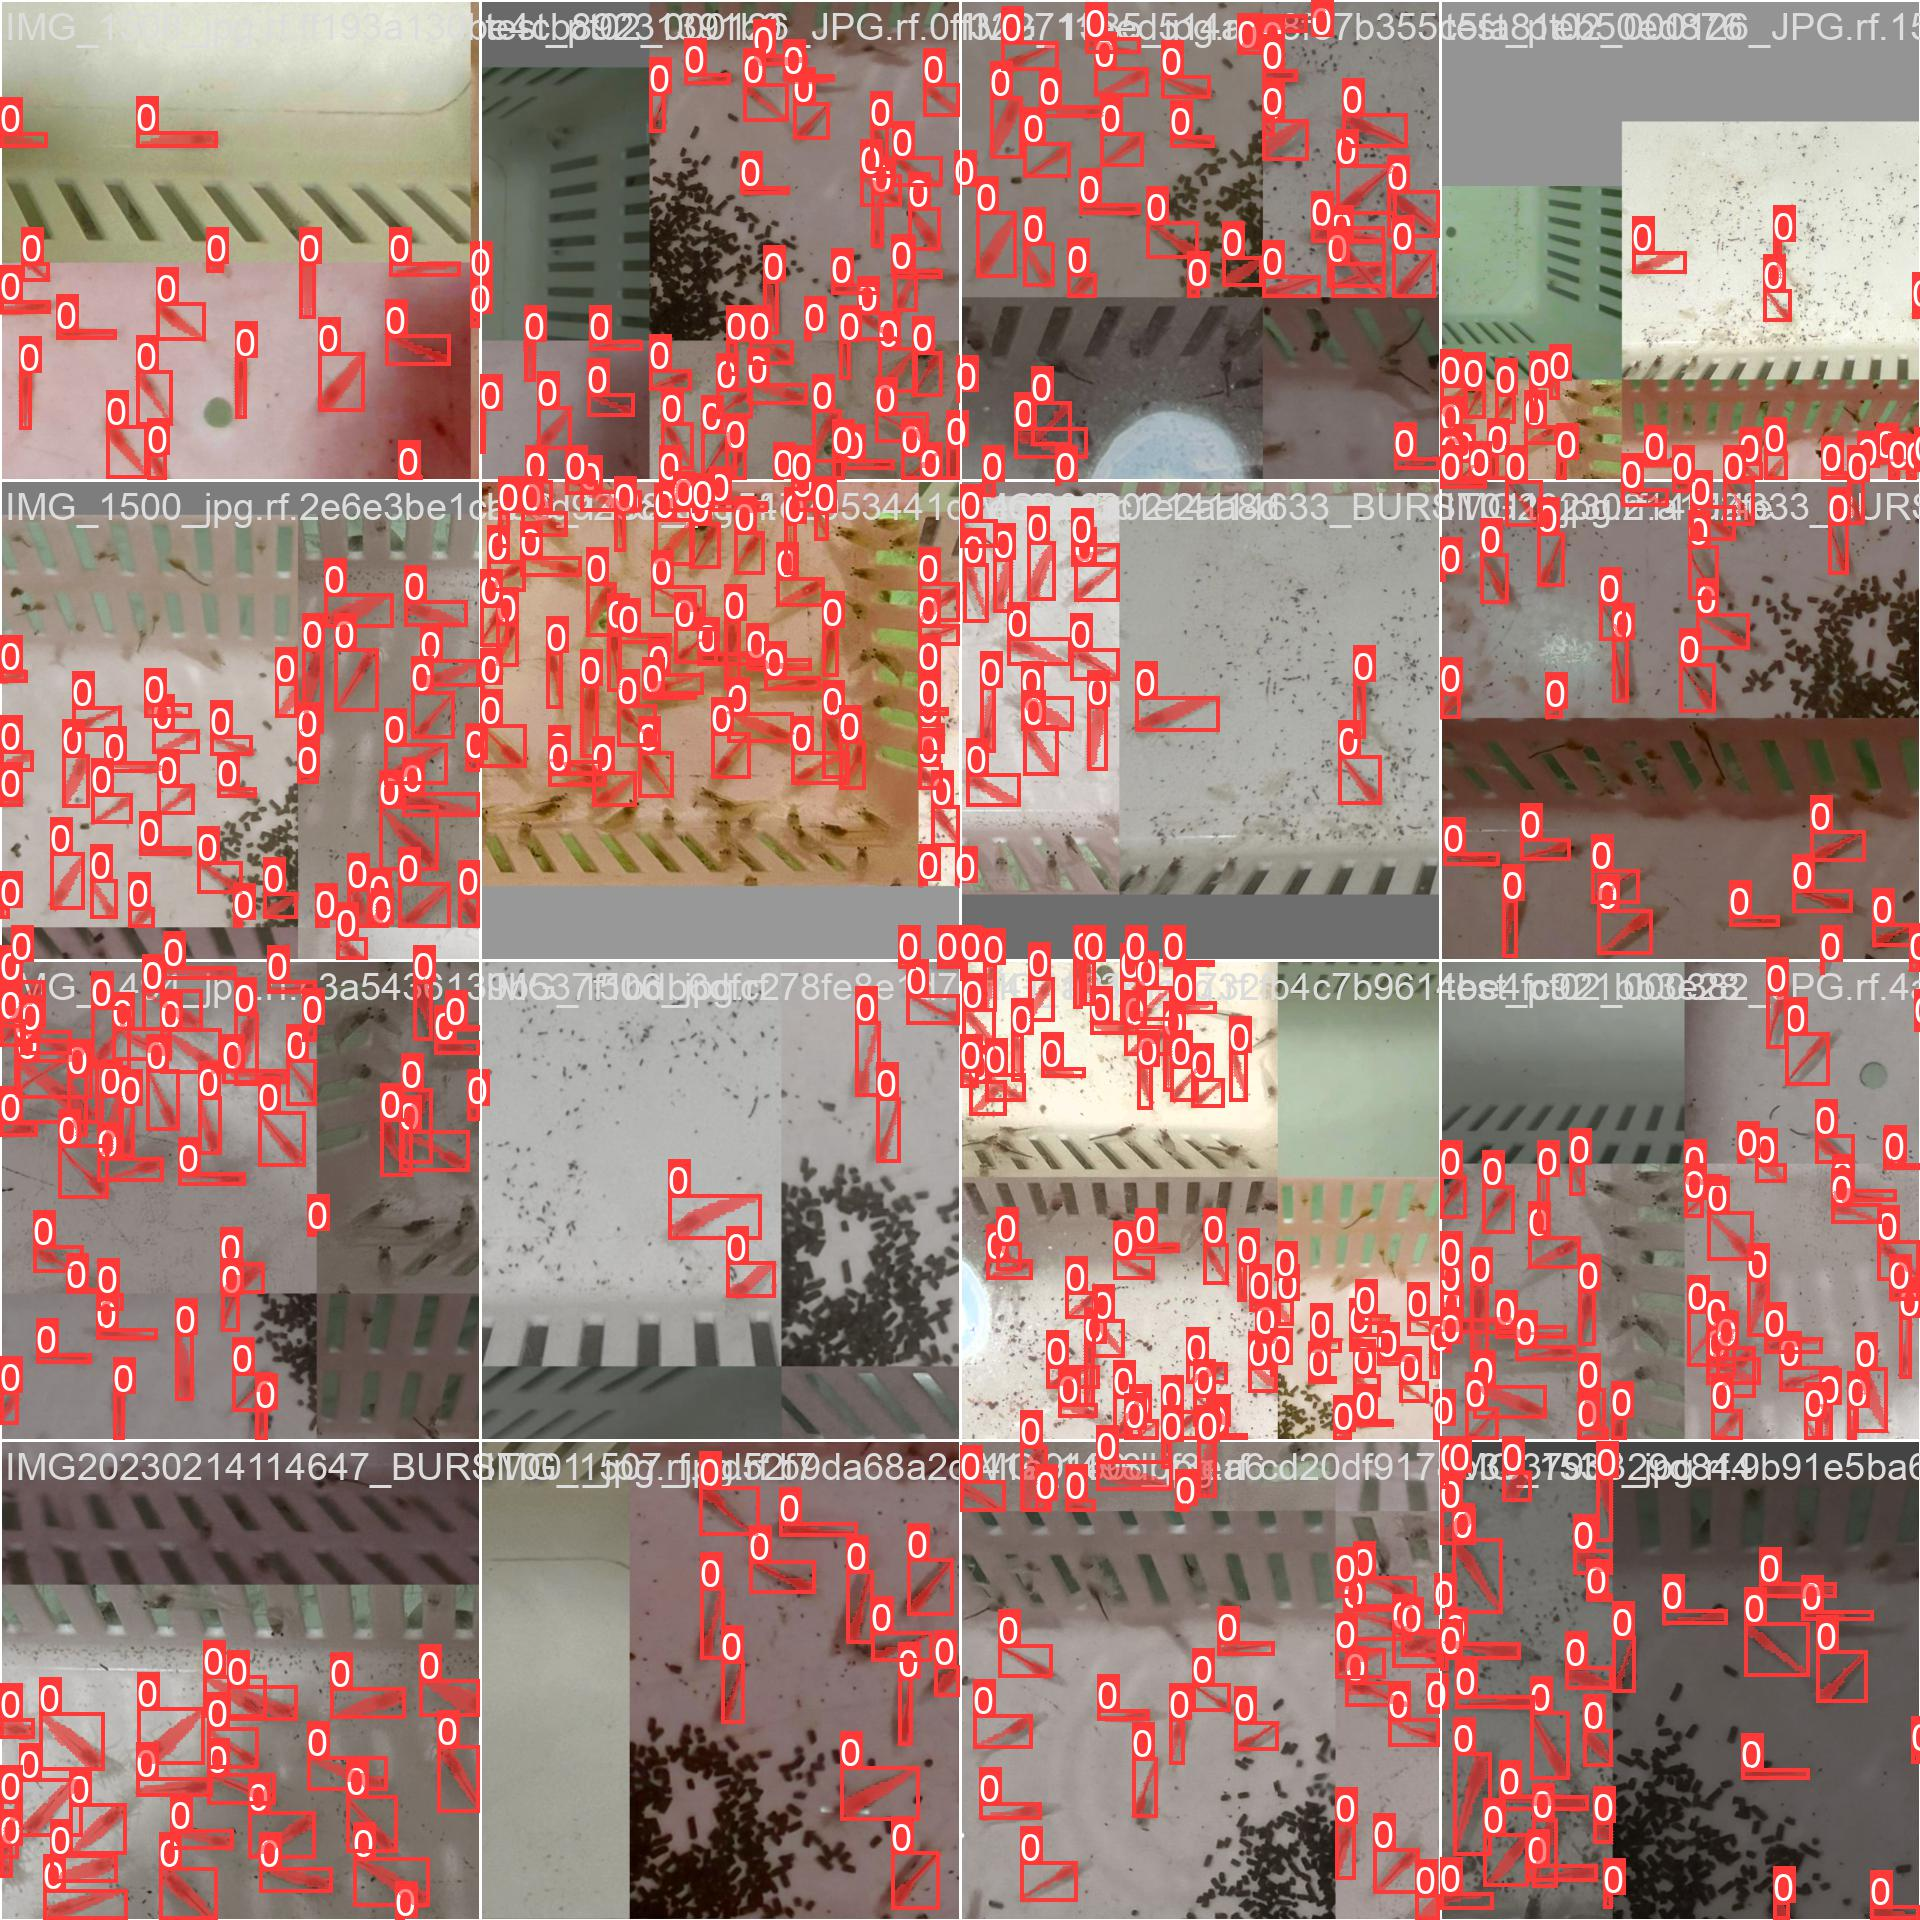

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/yolov8_shrimp_v15_20230531/train_batch2.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/yolov8_shrimp_v15_20230531/weights/best.pt data={dataset.location}/data.yaml

## Inference with Custom Model

path = "/content/drive/MyDrive/Works/Lab/Datasets/test_data_02/capture_image"

model = /content/drive/MyDrive/Temp/yolo_results/yolov8_shrimp_v9_20230507/weights/best.pt

In [ ]:
!yolo task=segment mode=predict model=/content/drive/MyDrive/Temp/yolo_results/yolov8_shrimp_v15_20230531/weights/best.pt conf=0.25 source=/content/datasets/yamato-shrimp-detection-15/test/images save=true

Ultralytics YOLOv8.0.120 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients

image 1/12 /content/datasets/yamato-shrimp-detection-15/test/images/IMG20230214114633_BURST016_jpg.rf.0d150b7ace9dab0c9d7a7a674c29a313.jpg: 480x640 29 shrimps, 78.5ms
image 2/12 /content/datasets/yamato-shrimp-detection-15/test/images/IMG20230214114633_BURST016_jpg.rf.3310705d0db34c8fd23ca532424f65d5.jpg: 480x640 31 shrimps, 16.7ms
image 3/12 /content/datasets/yamato-shrimp-detection-15/test/images/IMG20230214114633_BURST016_jpg.rf.49351ac522dbebf6a3d42854a6b2840d.jpg: 480x640 37 shrimps, 16.7ms
image 4/12 /content/datasets/yamato-shrimp-detection-15/test/images/IMG20230214114633_BURST016_jpg.rf.fdda69e0e55ae8cffe4aec58ef85056c.jpg: 480x640 25 shrimps, 16.7ms
image 5/12 /content/datasets/yamato-shrimp-detection-15/test/images/IMG20230214114636_BURST017_jpg.rf.13027e40c33c27f15d51604949b93247.jpg: 480x640 29 shrimps, 16.7ms
im

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model=/content/drive/MyDrive/Temp/yolo_results/yolov8_shrimp_v15_20230531/weights/best.pt conf=0.20 max_det=500 source=/content/drive/MyDrive/Works/Lab/Datasets/iphone_screenshot_0616_sf/sf_10 save=true show_labels=false show_conf=false boxes=False name=sf_08

/content
Ultralytics YOLOv8.0.120 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients

image 1/269 /content/drive/MyDrive/Works/Lab/Datasets/iphone_screenshot_0616_sf/sf_10/10150.jpeg: 384x640 (no detections), 76.0ms
image 2/269 /content/drive/MyDrive/Works/Lab/Datasets/iphone_screenshot_0616_sf/sf_10/10440.jpeg: 384x640 (no detections), 13.9ms
image 3/269 /content/drive/MyDrive/Works/Lab/Datasets/iphone_screenshot_0616_sf/sf_10/10730.jpeg: 384x640 (no detections), 13.9ms
image 4/269 /content/drive/MyDrive/Works/Lab/Datasets/iphone_screenshot_0616_sf/sf_10/11020.jpeg: 384x640 (no detections), 13.9ms
image 5/269 /content/drive/MyDrive/Works/Lab/Datasets/iphone_screenshot_0616_sf/sf_10/11310.jpeg: 384x640 (no detections), 13.9ms
image 6/269 /content/drive/MyDrive/Works/Lab/Datasets/iphone_screenshot_0616_sf/sf_10/1160.jpeg: 384x640 (no detections), 13.9ms
image 7/269 /content/drive/MyDrive/Works/Lab/Data

In [ ]:
!cp -r /content/len_cal_cropped_06/runs/segment/sf_10 /content/drive/MyDrive/Works/Lab/Datasets/dataset_seg_20230616

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:7]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
model = YOLO(f'/content/drive/MyDrive/Temp/yolo_results/yolov8_shrimp_v15_20230531/weights/best.pt')
results = model.predict(source='/content/test_pt03.mp4_snapshot_15.06.jpg', conf=0.25)


image 1/1 /content/test_pt03.mp4_snapshot_15.06.jpg: 384x640 196 shrimps, 15.0ms
Speed: 2.9ms preprocess, 15.0ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
shrimp_num = len(results[0].boxes.xyxy)

In [ ]:
res_plotted = results[0].plot(conf=False, line_width=None, font_size=None, pil=False, example='abc', boxes=False)

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(res_plotted)

**for shrimp counting**

In [ ]:
import numpy as np

sourceDir = ('/content/drive/MyDrive/Works/Lab/Datasets/0616藻蝦/3')

img_list = sorted((os.listdir(sourceDir)),key=len)


num_list = []

for i in img_list:
  model = YOLO(f'/content/drive/MyDrive/Temp/yolo_results/yolov8_shrimp_v15_20230531/weights/best.pt')
  num = model.predict(source=os.path.join(sourceDir, i), conf=0.25, max_det=500)
  shrimp_num = len(num[0].boxes.xyxy)

  num_list = np.append(num_list, shrimp_num)




image 1/1 /content/drive/MyDrive/Works/Lab/Datasets/0616藻蝦/3/shrimpfeed_03_00000.jpeg: 384x640 26 shrimps, 15.9ms
Speed: 39.9ms preprocess, 15.9ms inference, 64.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Works/Lab/Datasets/0616藻蝦/3/shrimpfeed_03_00001.jpeg: 384x640 24 shrimps, 15.4ms
Speed: 3.2ms preprocess, 15.4ms inference, 41.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Works/Lab/Datasets/0616藻蝦/3/shrimpfeed_03_00002.jpeg: 384x640 22 shrimps, 15.6ms
Speed: 5.8ms preprocess, 15.6ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Works/Lab/Datasets/0616藻蝦/3/shrimpfeed_03_00003.jpeg: 384x640 30 shrimps, 14.9ms
Speed: 2.1ms preprocess, 14.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Works/Lab/Datasets/0616藻蝦/3/shrimpfeed_03_00004.jpeg: 384x640 31 shrimps, 15.0ms
Speed: 2.4ms preprocess, 15.0ms in

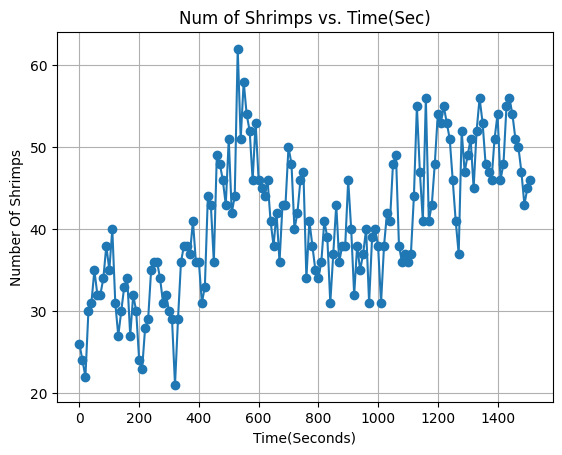

In [ ]:
import matplotlib.pyplot as plt

a = num_list

np.savetxt("num_list_03.csv", a, delimiter=",", fmt='%i')

t = len(num_list) * 10

time = np.arange(0, t, 10)
num = num_list

plt.plot(time, num, marker='o')

plt.title('Num of Shrimps vs. Time(Sec)')
plt.xlabel('Time(Seconds)')
plt.ylabel('Number Of Shrimps')

plt.grid(True)

plt.show()


# **Code Testing Playground**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/cropped_image_4 /content/drive/MyDrive/

In [ ]:
!cp -r /content/runs/segment/val /content/drive/MyDrive/Temp/yolo_results/yolov8_shrimp_v9_20230507

In [ ]:
import cv2
import numpy as np

def split_image(image):
    height, width = image.shape[:2]
    half_height = height // 2
    half_width = width // 2

    # 切割图片为四个部分
    top_left = image[0:half_height, 0:half_width]
    top_right = image[0:half_height, half_width:width]
    bottom_left = image[half_height:height, 0:half_width]
    bottom_right = image[half_height:height, half_width:width]

    return top_left, top_right, bottom_left, bottom_right

# 读取图片
image_path = '/content/IMG_1539.jpg'
image = cv2.imread(image_path)

# 将图片分割为四个部分
top_left, top_right, bottom_left, bottom_right = split_image(image)

In [ ]:
def merge_images(top_left, top_right, bottom_left, bottom_right):
    # 获取子图像的宽度和高度
    height = top_left.shape[0] + bottom_left.shape[0]
    width = top_left.shape[1] + top_right.shape[1]

    # 创建一个空白图像用于合并子图像
    merged_image = np.zeros((height, width, 3), dtype=np.uint8)

    # 将子图像放入合并图像的相应位置
    merged_image[:top_left.shape[0], :top_left.shape[1]] = top_left
    merged_image[:top_right.shape[0], top_left.shape[1]:] = top_right
    merged_image[top_left.shape[0]:, :bottom_left.shape[1]] = bottom_left
    merged_image[top_left.shape[0]:, top_left.shape[1]:] = bottom_right

    return merged_image

restored_image = merge_images(top_left, top_right, bottom_left, bottom_right)

# 显示原始图像和恢复的图像
cv2_imshow(restored_image)

In [ ]:
from ultralytics import YOLO

img_pth = "/content/IMG_1539_cropped_Fixed.jpg"
model = YOLO(f'/content/drive/MyDrive/Temp/yolo_results/yolov8_shrimp_v15_20230531/weights/best.pt')
results = model(source=img_pth, conf=0.25)


image 1/1 /content/IMG_1539_cropped_Fixed.jpg: 512x640 121 shrimps, 77.9ms
Speed: 2.5ms preprocess, 77.9ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
res_plotted = results[0].plot(conf=True, line_width=None, font_size=None, pil=False, example='abc', boxes=True)

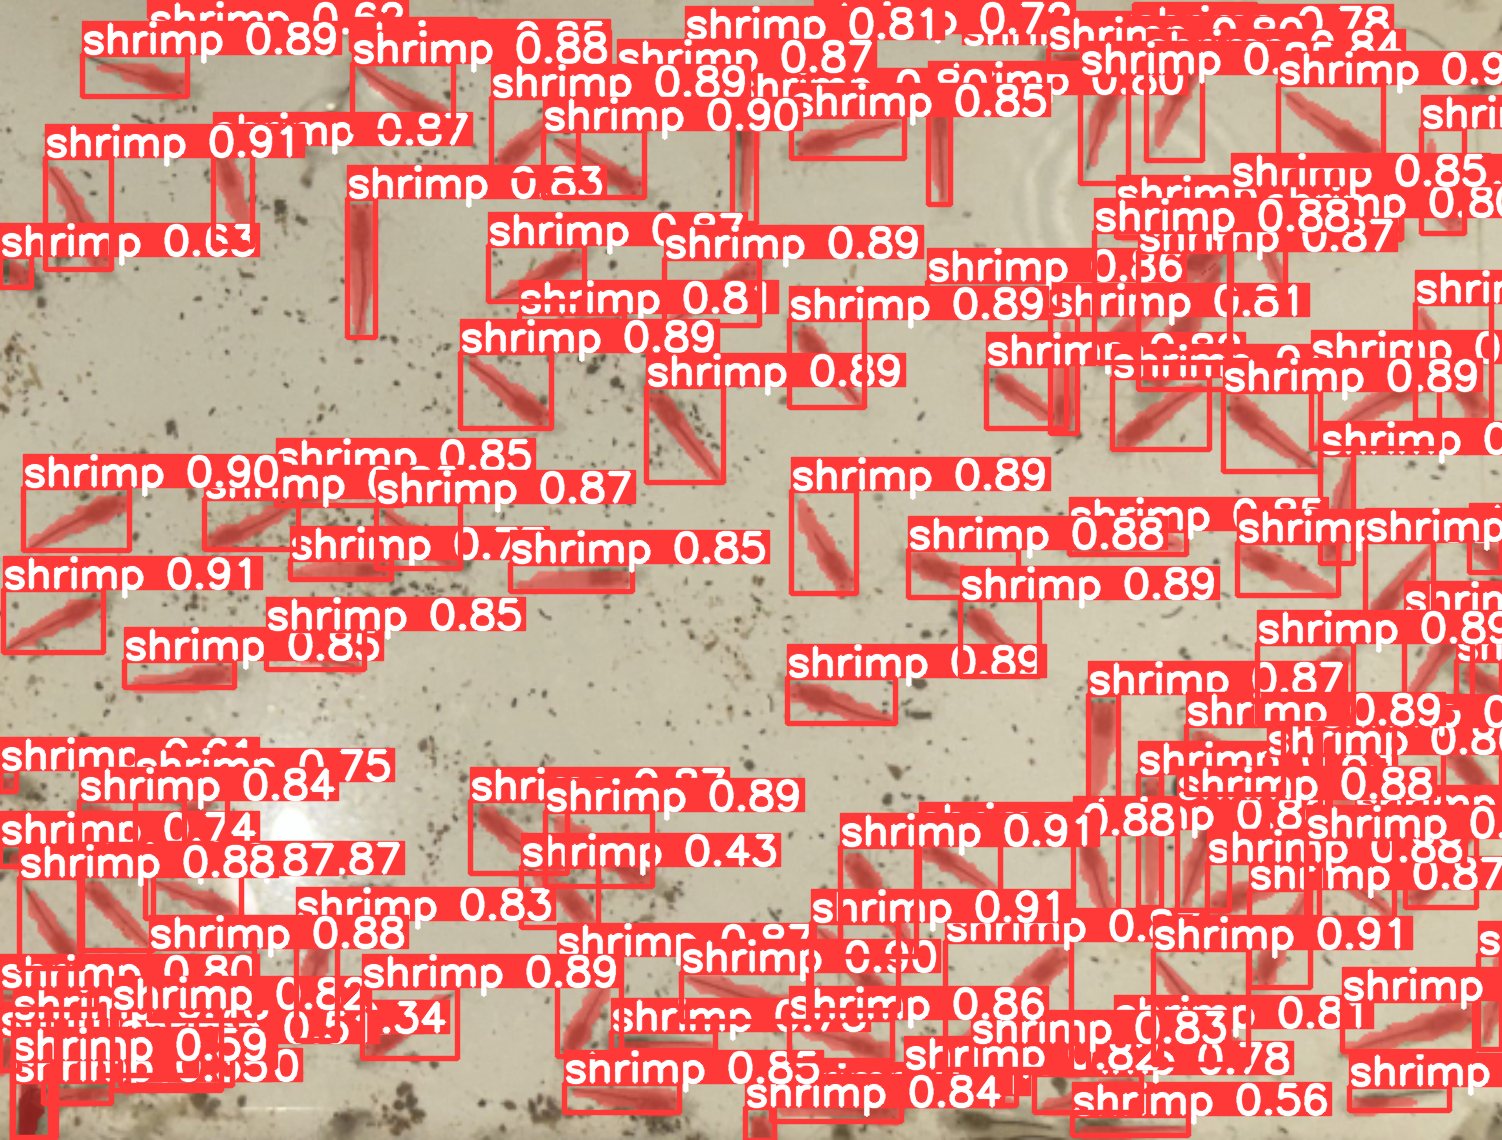

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(res_plotted)

In [ ]:
#results = model(inputs)
masks = results[0].masks  # Masks object

# Use 'Masks.xyn' for segments (normalized) and 'Masks.xy' for segments (pixels) instead

masks.xy  # bounding coordinates of masks, List[segment] * N

In [ ]:
masks.data  # raw masks tensor, (N, H, W) or masks.masks

In [ ]:
from ultralytics import YOLO
import numpy as np


class YOLOSegmentation:
    def __init__(self, model_path):
        self.model = YOLO(model_path)

    def detect(self, img):
        # Get img shape

        height, width, channels = img.shape

        results = self.model.predict(source=img.copy(), save=False, save_txt=False, conf=0.25)
        result = results[0]
        segmentation_contours_idx = []

        for seg in result.masks.segments:
            # contours
            seg[:, 0] *= width
            seg[:, 1] *= height
            segment = np.array(seg, dtype=np.int32)
            segmentation_contours_idx.append(segment)

        bboxes = np.array(result.boxes.xyxy.cpu(), dtype="int")

        # Get class ids
        class_ids = np.array(result.boxes.cls.cpu(), dtype="int")

        # Get confidences

        confidences = result.boxes.conf.to('cpu').numpy().astype(float)

        return bboxes, class_ids, segmentation_contours_idx, confidences


In [ ]:
img_pth = "/content/IMG_1539_cropped_Fixed.jpg"

In [ ]:
import cv2
import numpy as np

img =cv2.imread(img_pth)

img.shape


(1140, 1502, 3)

In [ ]:
# Make empty black image
image = np.zeros((img.shape),np.uint8)


0: 512x640 121 shrimps, 17.3ms
Speed: 2.7ms preprocess, 17.3ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'Masks.segments' is deprecated. Use 'Masks.xyn' for segments (normalized) and 'Masks.xy' for segments (pixels) instead.


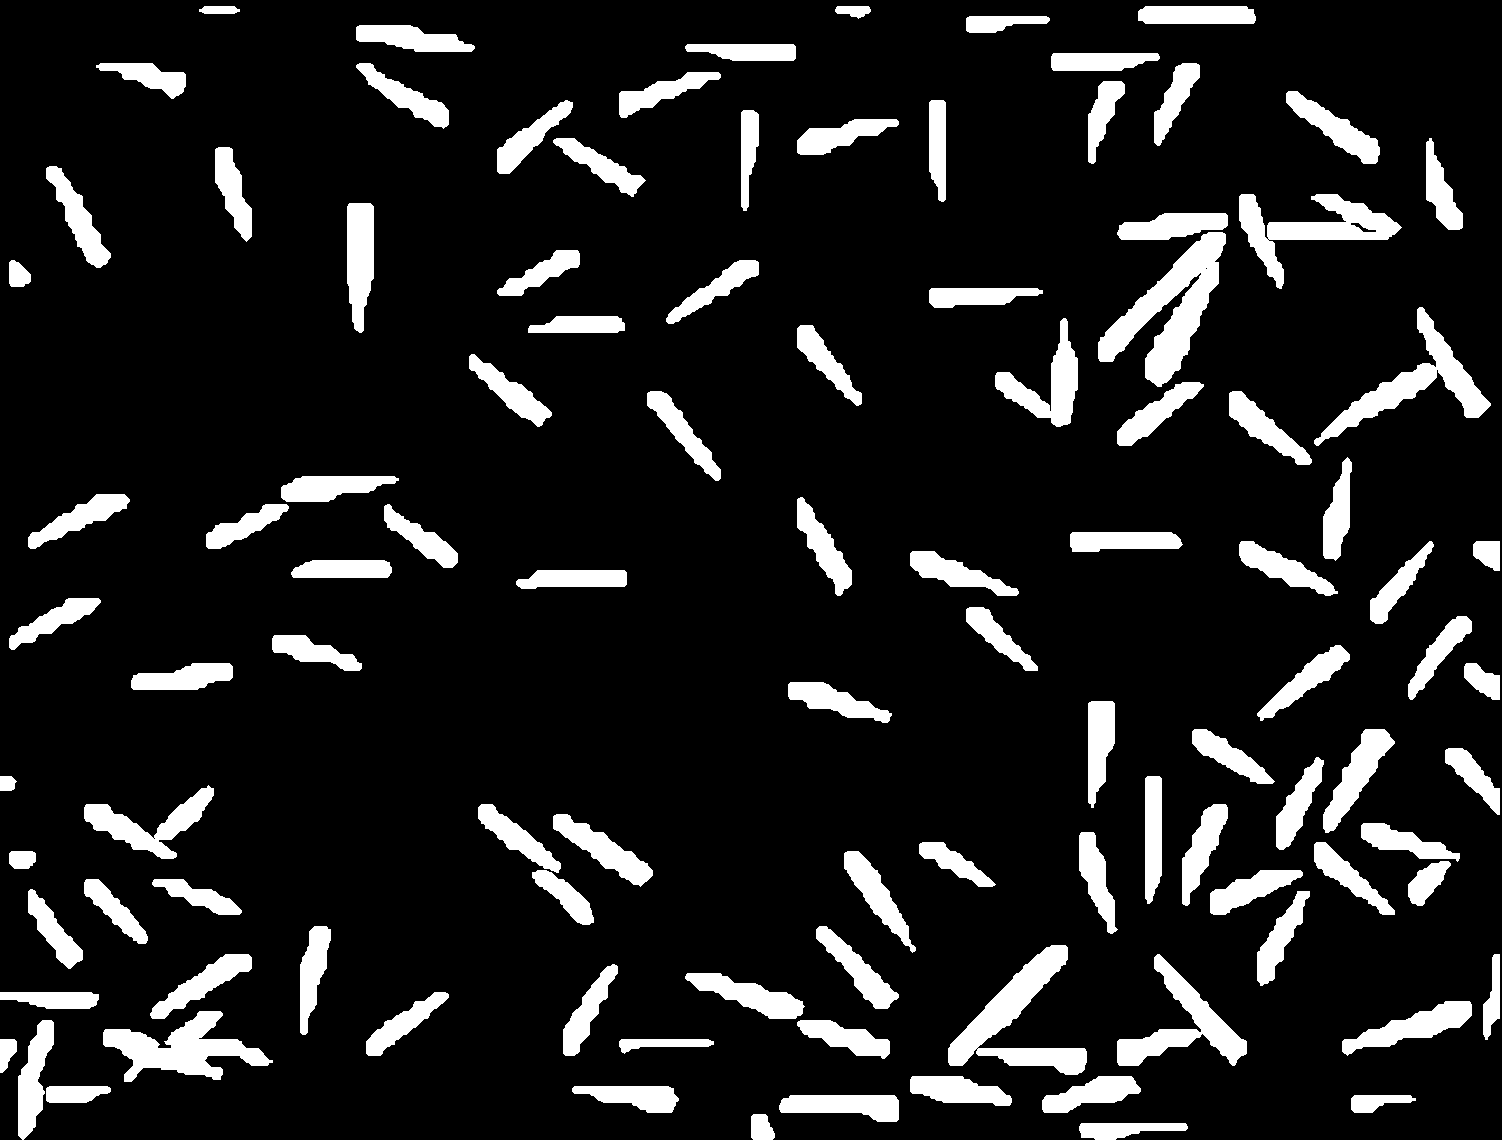

In [ ]:
from google.colab.patches import cv2_imshow
# Segmentation detector
ys = YOLOSegmentation('/content/drive/MyDrive/Temp/yolo_results/yolov8_shrimp_v15_20230531/weights/best.pt')

bboxes, classes, segmentations, confidences = ys.detect(img)

for bbox, class_id, seg, conf in zip(bboxes, classes, segmentations, confidences):

    #print("bbox:", bbox, "class id:", class_id, "seg:", seg, "score:", score)

    if class_id == 0:
      cv2.fillPoly(image, [seg] ,(255, 255, 255))

cv2_imshow(image)

In [ ]:
bboxes

array([[631,  70, 703, 145],
       [594, 173, 655, 263],
       [726, 467, 798, 516],
       [534,  68, 622, 119],
       [755,  89, 837, 163],
       [148, 813, 253, 870],
       [739,  29, 837,  84],
       [708,   1, 819,  59],
       [781, 684, 814, 782],
       [ 13, 741,  78, 837],
       [456, 779, 569, 801],
       [775, 803, 877, 837],
       [611, 828, 721, 864],
       [843, 220, 880, 314],
       [846, 314, 885, 416],
       [785, 847, 897, 872],
       [897, 874, 908, 888]])

In [ ]:
n = bboxes.shape[0]
n

121

In [ ]:
# Cropping

!mkdir /content/len_cal_cropped_00

%cd /content/len_cal_cropped_00

for n in range(0,n):
    filename = f"shrimp_crop_{n}.jpg"
    x_min, y_min, x_max, y_max = bboxes[n]
    image_crop = image[y_min:y_max, x_min:x_max]
    cv2.imwrite(filename,image_crop)


/content/len_cal_cropped_00


In [ ]:
!cp -r /content/len_cal_cropped_00/ /content/drive/MyDrive/Works/Lab/Datasets/iphone_screenshot_0616_sf/len_cropped